In [14]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the input image.
image_path = 'C:/Users/admin/AI_Posture_Check/test.JPG'
image = tf.io.read_file(image_path)
image = tf.compat.v1.image.decode_jpeg(image)
image = tf.expand_dims(image, axis=0)

# Resize and pad the image to keep the aspect ratio and fit the expected size.
image = tf.cast(tf.image.resize_with_pad(image, 192, 192), dtype=tf.int32)

# Download the model from TF Hub.
model = hub.load("https://tfhub.dev/google/movenet/singlepose/lightning/4")
movenet = model.signatures['serving_default']

# Run model inference.
outputs = movenet(image)
# Output is a [1, 1, 17, 3] tensor.
keypoints = outputs['output_0']


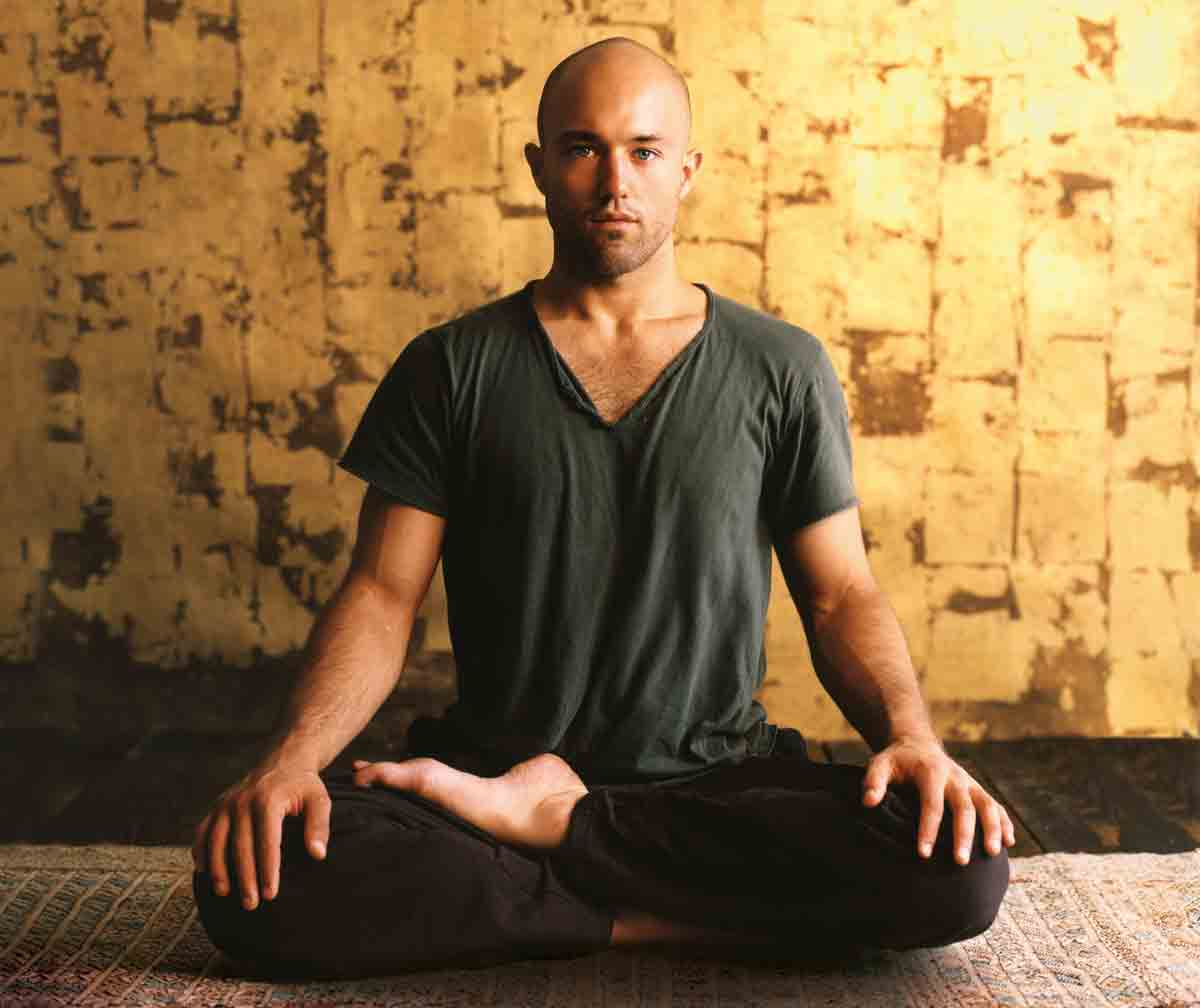

In [15]:
# Print the image
from IPython.display import Image
Image(filename='C:/Users/admin/AI_Posture_Check/test.JPG')

In [16]:
# To turn the output from tensor to numpy array, and to check the coordinates of the keypoints
print(keypoints.numpy()) 

[[[[0.22823873 0.51115155 0.7089687 ]
   [0.20048945 0.5361346  0.825483  ]
   [0.20156693 0.4865358  0.83140135]
   [0.21825473 0.57578164 0.89167124]
   [0.21898049 0.45532262 0.823172  ]
   [0.36607978 0.65831363 0.8778553 ]
   [0.365731   0.3686657  0.88279414]
   [0.5681945  0.6969618  0.9444554 ]
   [0.5748371  0.32188278 0.9000405 ]
   [0.6879684  0.7569518  0.92007005]
   [0.69937366 0.23994848 0.717899  ]
   [0.7184798  0.5963869  0.911088  ]
   [0.718048   0.40798745 0.86360824]
   [0.80363655 0.8072647  0.85656905]
   [0.8207077  0.19040924 0.83288765]
   [0.7736577  0.46318242 0.5028316 ]
   [0.8274399  0.54841316 0.58809716]]]]


In [17]:
# To extract the data from the array
nose_x = keypoints.numpy()[0,0,0,1]
nose_y = 1 - keypoints.numpy()[0,0,0,0]
left_eye_x = keypoints.numpy()[0,0,1,1]
left_eye_y = 1 - keypoints.numpy()[0,0,1,0]
right_eye_x = keypoints.numpy()[0,0,2,1]
right_eye_y = 1 - keypoints.numpy()[0,0,2,0]
left_ear_x = keypoints.numpy()[0,0,3,1]
left_ear_y = 1 - keypoints.numpy()[0,0,3,0]
right_ear_x = keypoints.numpy()[0,0,4,1]
right_ear_y = 1 - keypoints.numpy()[0,0,4,0]
left_shoulder_x = keypoints.numpy()[0,0,5,1]
left_shoulder_y = 1 - keypoints.numpy()[0,0,5,0]
right_shoulder_x = keypoints.numpy()[0,0,6,1]
right_shoulder_y = 1 - keypoints.numpy()[0,0,6,0]
left_elbow_x = keypoints.numpy()[0,0,7,1]
left_elbow_y = 1 - keypoints.numpy()[0,0,7,0]
right_elbow_x = keypoints.numpy()[0,0,8,1]
right_elbow_y = 1 - keypoints.numpy()[0,0,8,0]
left_wrist_x = keypoints.numpy()[0,0,9,1]
left_wrist_y = 1 - keypoints.numpy()[0,0,9,0]
right_wrist_x = keypoints.numpy()[0,0,10,1]
right_wrist_y = 1 - keypoints.numpy()[0,0,10,0]
left_hip_x = keypoints.numpy()[0,0,11,1]
left_hip_y = 1 - keypoints.numpy()[0,0,11,0]
right_hip_x = keypoints.numpy()[0,0,12,1]
right_hip_y = 1 - keypoints.numpy()[0,0,12,0]
left_knee_x = keypoints.numpy()[0,0,13,1]
left_knee_y = 1 - keypoints.numpy()[0,0,13,0]
right_knee_x = keypoints.numpy()[0,0,14,1]
right_knee_y = 1 - keypoints.numpy()[0,0,14,0]
left_ankle_x = keypoints.numpy()[0,0,15,1]
left_ankle_y = 1 - keypoints.numpy()[0,0,15,0]
right_ankle_x = keypoints.numpy()[0,0,16,1]
right_ankle_y = 1 - keypoints.numpy()[0,0,16,0]

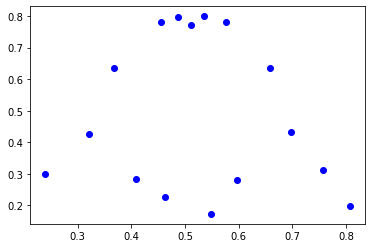

In [18]:
# To plot the graph
import matplotlib.pyplot as plt
plt.plot([nose_x,left_eye_x,right_eye_x,left_ear_x,right_ear_x,left_shoulder_x,right_shoulder_x,left_elbow_x,right_elbow_x,left_wrist_x,right_wrist_x,left_hip_x,right_hip_x,left_knee_x,left_ankle_x,right_ankle_x],
        [nose_y,left_eye_y,right_eye_y,left_ear_y,right_ear_y,left_shoulder_y,right_shoulder_y,left_elbow_y,right_elbow_y,left_wrist_y,right_wrist_y,left_hip_y,right_hip_y,left_knee_y,left_ankle_y,right_ankle_y], 'bo')